# ***Homework B3***
# Complete the CATsvsDOGs classification draft program.

- In particular you have to build a model that is able to obtain at least 80% accuracy on validation.

- Make at least 10 epochs.

- You don't have to use the models already estimated on Imaginette, but build your own Neural Network.

- Tip: in order for the model to perform well, it is worth considering models with at least 5 million parameters. 

- Once finished, Upload the notebook with all outputs.

## Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

## Introduction

This example shows how to do image classification from scratch, starting from JPEG
image files on disk, without leveraging pre-trained weights or a pre-made Keras
Application model. We demonstrate the workflow on the Kaggle Cats vs Dogs binary
 classification dataset.

We use the `image_dataset_from_directory` utility to generate the datasets, and
we use Keras image preprocessing layers for image standardization and data augmentation.


## Setup


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Load the data: the Cats vs Dogs dataset

### Raw data download

First, let's download the ZIP archive of the raw data:
https://drive.google.com/file/d/1tftKHR6a00sSAKBmwt-GqbBWidRDJol6/view?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/data.zip
!ls

Archive:  /content/drive/MyDrive/data.zip
replace data/cats/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: data  drive  sample_data


Now we have a `PetImages` folder which contain two subfolders, `Cat` and `Dog`. Each
 subfolder contains image files for each category.


## Using image data augmentation

When you don't have a large image dataset, it's a good practice to artificially
introduce sample diversity by applying random yet realistic transformations to the
training images, such as random horizontal flipping or small random rotations. This
helps expose the model to different aspects of the training data while slowing down
 overfitting.


## Generate the Train and the Validation datasets
## with data augmentation


In [ ]:
image_size = (220, 220)


datagen = ImageDataGenerator( rescale=1./255,
        rotation_range=3, 
        zoom_range = 0.01, 
        width_shift_range=0.01,  
        height_shift_range=0.01, 
        horizontal_flip=True,  
        validation_split=0.2) 
train_ds = datagen.flow_from_directory(
        "data", target_size=image_size, color_mode='rgb', class_mode='categorical',
         batch_size=32, shuffle=True, seed=123,
        subset='training')
val_ds = datagen.flow_from_directory(
        "data", target_size=image_size, color_mode='rgb', class_mode='categorical',
         batch_size=32, seed=123,
        subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Visualize the data

Here are the first 16 images in the training dataset. As you can see, label 1 is "dog" and label 0 is "cat".


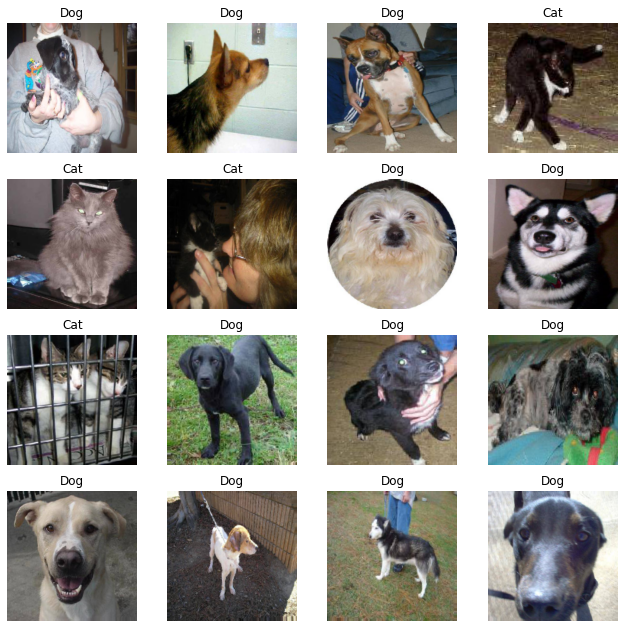

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
images=train_ds[0][0]
labels=train_ds[0][1]
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(images[i].astype("float32"))
  if labels[i][0] == 0.0:
    lab = "Dog"
  elif labels[i][0] == 1.0:
    lab = "Cat"  
  plt.title(lab)
  plt.axis("off")

## Build a model




In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten

In [ ]:
inp = Input((220,220,3))

x = Conv2D(64,(3,3),activation='relu',padding='same')(inp)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)


x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.3)(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

out = Dense(2, activation='softmax')(x)

model = Model(inp, out)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 220, 220, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 64)      1792      
                                                                 
 batch_normalization_4 (Batc  (None, 220, 220, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 110, 110, 64)      3692

## Train the model


In [ ]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_ds, epochs=15, batch_size=10, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 305s 487ms/step - loss: 0.3583 - accuracy: 0.8429 - val_loss: 0.3570 - val_accuracy: 0.8500
Epoch 2/15
625/625 [==============================] - 310s 496ms/step - loss: 0.3303 - accuracy: 0.8531 - val_loss: 0.3332 - val_accuracy: 0.8596
Epoch 3/15
625/625 [==============================] - 308s 492ms/step - loss: 0.2986 - accuracy: 0.8717 - val_loss: 0.3439 - val_accuracy: 0.8486
Epoch 4/15
625/625 [==============================] - 300s 480ms/step - loss: 0.2771 - accuracy: 0.8823 - val_loss: 0.2995 - val_accuracy: 0.8802
Epoch 5/15
625/625 [==============================] - 296s 474ms/step - loss: 0.2524 - accuracy: 0.8939 - val_loss: 0.2763 - val_accuracy: 0.8812
Epoch 6/15
625/625 [==============================] - 296s 474ms/step - loss: 0.2244 - accuracy: 0.9076 - val_loss: 0.2556 - val_accuracy: 0.8960
Epoch 7/15
625/625 [==============================] - 297s 476ms/step - loss: 0.2055 - accuracy: 0.9164 - val_loss: 0.2472 -

### We can obtain to >90% validation accuracy 


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(val_ds)

print("Loss of Model: ",score[0])
print("Accuracy of Model: ", score[1]*100, "%")

157/157 [==============================] - 56s 356ms/step - loss: 0.2401 - accuracy: 0.9122
Loss of Model:  0.24005447328090668
Accuracy of Model:  91.21999740600586 %


In [ ]:
val_ds.batch_size = 1

y = np.zeros((5000,2))
for j in range(5000):
  y[j,:] = val_ds[j][1]
ypred = model.predict(val_ds)

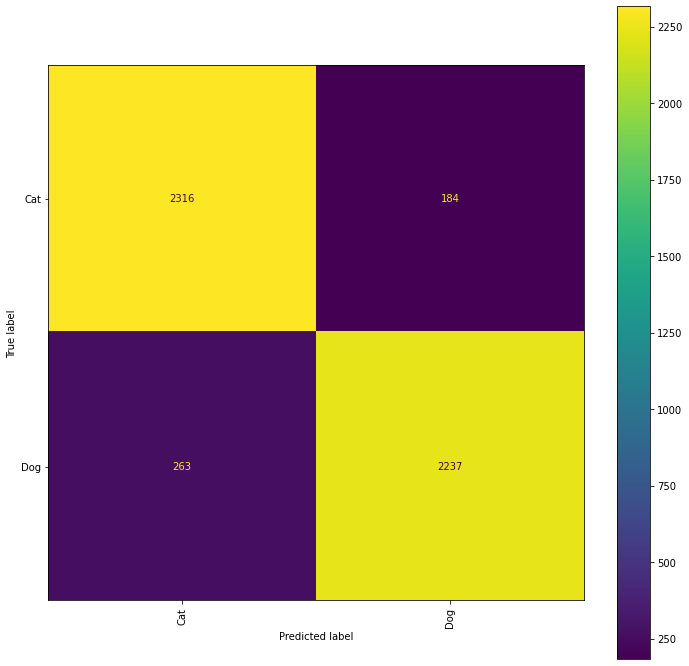

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ystim = np.argmax(ypred,axis=1)
ytrue = np.argmax(y,axis=1)
conf = confusion_matrix(ytrue,ystim)
names = ["Cat", "Dog"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                              display_labels=names)


fig, ax = plt.subplots(figsize=(12, 12))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='viridis')

plt.show()

My algorithm predicts:

Prediction of being a picture of Cat :  3.5332925617694855 %
Prediction of being a picture of Dog :  96.46670818328857 %


Selected picture: Dog


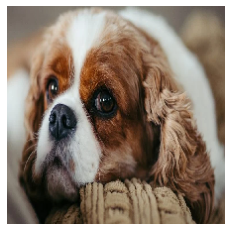

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "test.jpg" 

img = image.load_img(img_path, target_size=(220, 220))
A = image.img_to_array(img)/255.
B = A.reshape(1,220,220,3)
my_prediction = model.predict(B)
np.set_printoptions(suppress=True,precision=4)

print("My algorithm predicts:\n")

for i in range(2):
  print("Prediction of being a picture of", names[i], ": ", my_prediction[0][i]*100, "%")
print("\n")
print("Selected picture:",names[np.argmax(my_prediction)])

plt.imshow(A)
plt.axis('off')
plt.show()

